# Work environment setup, need to adjust to yours

In [ ]:
from google.colab import drive
import os
from pathlib import Path

drive.mount('/content/drive', force_remount=True)
base = Path("/content/drive/My Drive/Colab Notebooks/Implementation") # Enter the path you have put my folder in
os.chdir(base)
path_map = base / "input" / "map_screenshot.png"
path_forecast = base / "input" / "marine_forecast_route_2D.csv"


Mounted at /content/drive


In [ ]:
!pip install mosek

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 68.3 MB/s eta 0:00:00


# Creation of a 2D map using a google map screenshot of the Saint-Laurent River

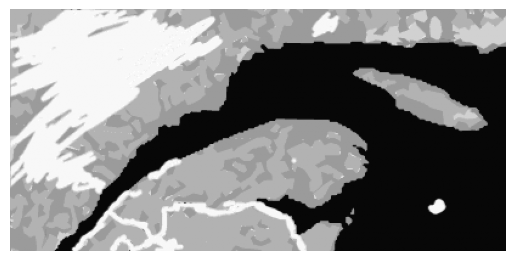

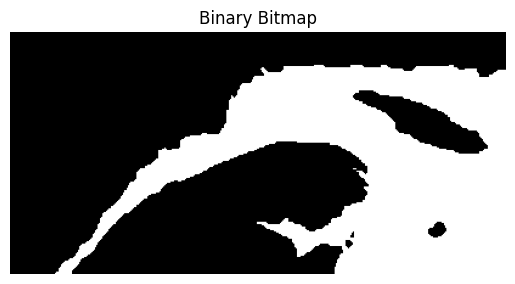

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = Image.open(path_map).convert("L")  # "L" mode = 8-bit pixels, black and white

# Convert to numpy array
img_array = np.array(img)

# Display the image
plt.imshow(img_array, cmap="gray")
plt.axis("off")  # Optional: turn off axis
plt.show()

# Threshold: convert to binary (0 or 1)
threshold = 210  # because pixel values go from 0 to 255
binary_bitmap = (img_array < threshold).astype(np.uint8)  # 1 if "black enough", 0 otherwise

# Display binary image
plt.imshow(binary_bitmap, cmap="gray")
plt.axis("off")
plt.title("Binary Bitmap")
plt.show()


# Manual definition of the zones and visualization

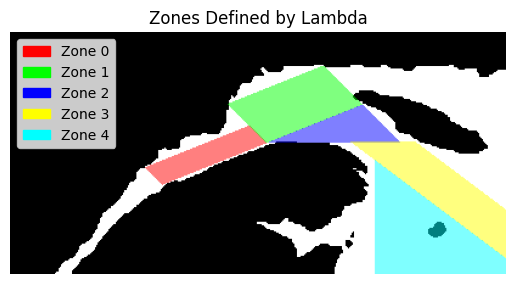

In [ ]:
import numpy as np
import matplotlib.patches as mpatches

# Each zone has 4 inequalities: (a, b, c) such that a*y + b*x + c >= 0
lambda_array = np.zeros((3, 4, 5))  # shape: (3 coefficients, 4 inequalities, 5 zones)

# Zone 0
lambda_array[:, :, 0] = np.array([
    [  -1,   1,   1,   -1],     # (coefficient for y)
    [1, -1, 0.4, -0.4],     # (coefficient for x)
    [0, 120, -155, 175]
])

# Zone 1
lambda_array[:, :, 1] = np.array([
    [  -1,   1,   1,   -1],     # (coefficient for y)
    [1, -1, 0.4, -0.4],     # (coefficient for x)
    [-120, 230, -130, 175]
])
# Zone 2
lambda_array[:, :, 2] = np.array([
    [  -1,   1,   -1,   1],     # (coefficient for y)
    [1, -1, 0, 0.4],     # (coefficient for x)
    [-120, 230, 90, -175]
])
# Zone 3
lambda_array[:, :, 3] = np.array([
    [  0,   1,   1,   -1],     # (coefficient for y)
    [-1, -0.75, 0, 0.75],     # (coefficient for x)
    [408, 160, -90, -120]
])
# Zone 4
lambda_array[:, :, 4] = np.array([
    [  0,   0,   1,   -1],     # (coefficient for y)
    [-1, 1, -0.75, 0],     # (coefficient for x)
    [408, -300, 120, 200]  #
])


def generate_zone_mask(lambda_zone, shape):
    h, w = shape
    Y, X = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
    mask = np.ones((h, w), dtype=bool)

    for j in range(4):  # 4 inequalities
        a, b, c = lambda_zone[:, j]
        mask &= (a * Y + b * X + c >= 0)

    return mask.astype(int)

zone_colors = {
    0: np.array([255, 0, 0]),
    1: np.array([0, 255, 0]),
    2: np.array([0, 0, 255]),
    3: np.array([255, 255, 0]),
    4: np.array([0, 255, 255]),
}

rgb_image = np.stack([binary_bitmap * 255] * 3, axis=-1).astype(np.uint8)
alpha = 0.5

for z in range(5):  # 5 zones
    zone_mask = generate_zone_mask(lambda_array[:, :, z], binary_bitmap.shape)
    mask = zone_mask == 1
    rgb_image[mask] = ((1 - alpha) * rgb_image[mask] + alpha * zone_colors[z]).astype(np.uint8)

# Show the image
fig, ax = plt.subplots()
ax.imshow(rgb_image)
ax.axis("off")
ax.set_title("Zones Defined by Lambda")

patches = [mpatches.Patch(color=color / 255.0, label=f'Zone {z}') for z, color in zone_colors.items()]
ax.legend(handles=patches, loc='upper left', framealpha=0.8)
plt.show()


NameError: name 'zone_centroids' is not defined

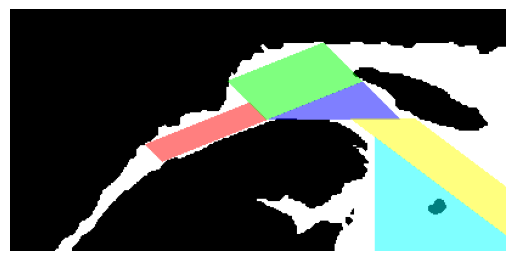

In [ ]:
# Each zone has 4 inequalities: (a, b, c) such that a*y + b*x + c >= 0
lambda_array = np.zeros((3, 4, 5))  # shape: (3 coefficients, 4 inequalities, 5 zones)

# Zone 0
lambda_array[:, :, 0] = np.array([
    [  -1,   1,   1,   -1],     # (coefficient for y)
    [1, -1, 0.4, -0.4],     # (coefficient for x)
    [0, 120, -155, 175]
])

# Zone 1
lambda_array[:, :, 1] = np.array([
    [  -1,   1,   1,   -1],     # (coefficient for y)
    [1, -1, 0.4, -0.4],     # (coefficient for x)
    [-120, 230, -130, 175]
])
# Zone 2
lambda_array[:, :, 2] = np.array([
    [  -1,   1,   -1,   1],     # (coefficient for y)
    [1, -1, 0, 0.4],     # (coefficient for x)
    [-120, 230, 90, -175]
])
# Zone 3
lambda_array[:, :, 3] = np.array([
    [  0,   1,   1,   -1],     # (coefficient for y)
    [-1, -0.75, 0, 0.75],     # (coefficient for x)
    [408, 160, -90, -120]
])
# Zone 4
lambda_array[:, :, 4] = np.array([
    [  0,   0,   1,   -1],     # (coefficient for y)
    [-1, 1, -0.75, 0],     # (coefficient for x)
    [408, -300, 120, 200]  #
])


def generate_zone_mask(lambda_zone, shape):
    h, w = shape
    Y, X = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
    mask = np.ones((h, w), dtype=bool)

    for j in range(4):  # 4 inequalities
        a, b, c = lambda_zone[:, j]
        mask &= (a * Y + b * X + c >= 0)

    return mask.astype(int)

zone_colors = {
    0: np.array([255, 0, 0]),
    1: np.array([0, 255, 0]),
    2: np.array([0, 0, 255]),
    3: np.array([255, 255, 0]),
    4: np.array([0, 255, 255]),
}

rgb_image = np.stack([binary_bitmap * 255] * 3, axis=-1).astype(np.uint8)
alpha = 0.5

for z in range(5):  # 5 zones
    zone_mask = generate_zone_mask(lambda_array[:, :, z], binary_bitmap.shape)
    mask = zone_mask == 1
    rgb_image[mask] = ((1 - alpha) * rgb_image[mask] + alpha * zone_colors[z]).astype(np.uint8)

# Show the image
fig, ax = plt.subplots()
ax.imshow(rgb_image)
ax.axis("off")

patches = [mpatches.Patch(color=color / 255.0, label=f'Zone {z}') for z, color in zone_colors.items()]


if 0 in zone_centroids and 4 in zone_centroids:
    y0, x0 = zone_centroids[0]
    y4, x4 = zone_centroids[4]
    ax.plot([x0, x4], [y0, y4], color="white", linewidth=2, linestyle="--")
plt.show()


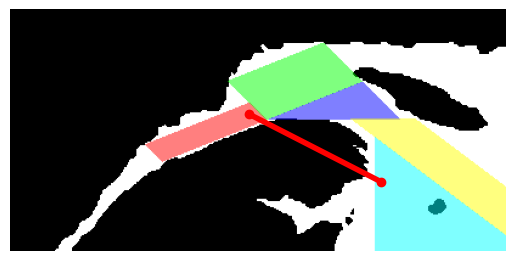

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- your existing code above here (lambda_array, generate_zone_mask, etc.) ---

# Display image
fig, ax = plt.subplots()
ax.imshow(rgb_image)
ax.axis("off")

# Add zone label patches
patches = [mpatches.Patch(color=color / 255.0, label=f'Zone {z}') for z, color in zone_colors.items()]

# Compute centroids for each zone
zone_centroids = {}
for z in range(5):
    mask = generate_zone_mask(lambda_array[:, :, z], binary_bitmap.shape)
    coords = np.argwhere(mask == 1)
    if coords.size > 0:
        centroid = coords.mean(axis=0)  # format: (y, x)
        zone_centroids[z] = centroid

# Draw a line from zone 0 to zone 4
if 0 in zone_centroids and 4 in zone_centroids:
    y0, x0 = zone_centroids[0]
    y4, x4 = zone_centroids[4]
    ax.plot([x0+35, x4-35], [y0-15, y4-25], color="red", linewidth=4)
    ax.plot(x0+35, y0-15, 'ro')  # White circle at Zone 0
    ax.plot(x4-35, y4-25, 'ro')  # White circle at Zone 4

plt.show()


# Manual definition of transition zones

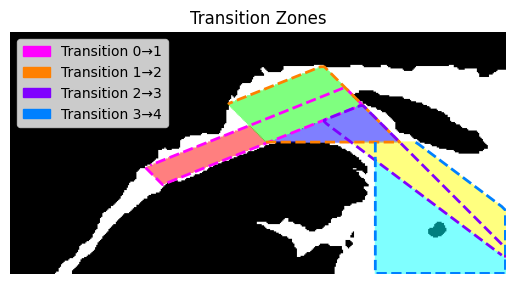

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.path import Path
from scipy.spatial import ConvexHull

# Background image using binary_bitmap
h, w = binary_bitmap.shape
rgb_image = np.stack([binary_bitmap * 255] * 3, axis=-1).astype(np.uint8)

# Define transitions (a, b, c) x 4 inequalities x from_zone x to_zone
sigma_array = np.zeros((3, 4, 5, 5))

# Manually defined transitions
sigma_array[:, :, 0, 1] = np.array([
    [-1,   1,   1,   -1],
    [1,   -1,   0.4, -0.4],
    [0,   230, -155, 175]
])
sigma_array[:, :, 1, 2] = np.array([
    [-1,   1,   1,   -1],
    [1,   -1,   0.4, 0],
    [-120, 230, -130, 90]
])
sigma_array[:, :, 2, 3] = np.array([
    [-1,   1,   1,   -1],
    [1,   -1,   0.4, 0.75],
    [-120, 230, -175, -120]
])
sigma_array[:, :, 3, 4] = np.array([
    [0,   1,   1,   0],
    [-1, -0.75, 0, 1],
    [408, 160, -90, -300]
])

# Transition line colors
transition_colors = {
    (0, 1): np.array([255, 0, 255]),   # Magenta
    (1, 2): np.array([255, 128, 0]),   # Orange
    (2, 3): np.array([128, 0, 255]),   # Purple
    (3, 4): np.array([0, 128, 255])    # Sky blue
}

# Helper: evaluate polygon points from inequalities
def extract_polygon_points(sigma_transition, shape):
    h, w = shape
    Y, X = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
    mask = np.ones((h, w), dtype=bool)
    for j in range(4):
        a, b, c = sigma_transition[:, j]
        mask &= (a * Y + b * X + c >= 0)
    return np.column_stack(np.where(mask))


rgb_image = np.stack([binary_bitmap * 255] * 3, axis=-1).astype(np.uint8)
alpha = 0.5

for z in range(5):  # 5 zones
    zone_mask = generate_zone_mask(lambda_array[:, :, z], binary_bitmap.shape)
    mask = zone_mask == 1
    rgb_image[mask] = ((1 - alpha) * rgb_image[mask] + alpha * zone_colors[z]).astype(np.uint8)

# Plot
fig, ax = plt.subplots()
ax.imshow(rgb_image)
ax.axis("off")
ax.set_title("Transition Zones")

legend_patches = []

for (i, j), color in transition_colors.items():
    sigma = sigma_array[:, :, i, j]
    if not np.all(sigma == 0):
        points = extract_polygon_points(sigma, (h, w))
        if points.shape[0] < 3:
            continue  # skip degenerate
        # Convex hull to order boundary points
        hull = ConvexHull(points)
        boundary = points[hull.vertices]
        ax.plot(boundary[:, 1], boundary[:, 0], linestyle='--', linewidth=2,
                color=color / 255.0, label=f'Transition {i}→{j}')
        legend_patches.append(mpatches.Patch(color=color / 255.0, label=f'Transition {i}→{j}'))

# Add legend
ax.legend(handles=legend_patches, loc='upper left', framealpha=0.8)
plt.show()


# Load static meteo data for each zone for each timestamp

In [ ]:
import numpy as np
import pandas as pd

# Load the CSV file
df = pd.read_csv(path_forecast, parse_dates=['Timestamp'])

#Compute x,y wind and current speeds
df['Wind_Speed_X'] = np.cos(np.deg2rad(df['Wind Direction']))*df['Wind Speed']
df['Wind_Speed_Y'] = np.sin(np.deg2rad(df['Wind Direction']))*df['Wind Speed']
df['Current_Speed_X'] = np.cos(np.deg2rad(df['Current Direction']))*df['Current Speed']
df['Current_Speed_Y'] = np.sin(np.deg2rad(df['Current Direction']))*df['Current Speed']
df.drop(columns=['Wind Speed', 'Wind Direction', 'Current Speed', 'Current Direction'], inplace=True)

# Sort values by Location and Timestamp
df = df.sort_values(by=['Location', 'Timestamp'])

# Get unique locations and timestamps
locations = df['Location'].unique()
timestamps = df['Timestamp'].unique()

# Remove non-meteorological columns
meteo_columns = df.columns[2:]

# Create a 3D numpy array
meteo_data = np.empty((len(locations), len(timestamps), len(meteo_columns)))

# Populate the array
for i, loc in enumerate(locations):
    for j, time in enumerate(timestamps):
        row = df[(df['Location'] == loc) & (df['Timestamp'] == time)]
        if not row.empty:
            meteo_data[i, j, :] = row[meteo_columns].values
        else:
            meteo_data[i, j, :] = 0

# Print array shape
print(f"Data Shape: {meteo_data.shape} (locations, timestamps, meteo variables)")


#column indexes for access in the optimization problem
wave_height_idx = 0
wave_direction_idx = 1
wave_period_idx = 2
temperature_2m_idx = 3
direct_radiation_idx = 4
wind_speed_X = 5
wind_speed_Y = 6
current_speed_X = 7
current_speed_Y = 8



Data Shape: (5, 18, 9) (locations, timestamps, meteo variables)


# Define problem parameters

In [ ]:
M = 1000000
nb_zones = meteo_data.shape[0]
T = meteo_data.shape[1]
delta = 1 #h
mass = 0.1

#Ship path
rampe_min = -40
rampe_max = 40
v_max = 200
arrival_y = 166
arrival_x = 340
departure_y = 111
departure_x = 112

#Generation
a =[0.533, 0.433]
b = [10.669, 12.669]
c = [0,0]
pg_min = [0,0]
pg_max = [200,200]
G = len(pg_max)

#Shore power
terminals = [[departure_y,departure_x],[arrival_y,arrival_x]]
max_shore_power = [20,40]
shore_power_cost = [0.1,0.2]
O = len(terminals)
distance_tol = 0.01
speed_tol = 0.01

#Onboard battery
leak_battery = 0.999
eff_charge = 0.95
eff_discharge = 0.95
y_min = 0
y_max = 20
mu_min = 0
mu_max = 20
s_min = 0
s_max = 100

#Electric motors
eff_motors = 0.7
pm_min = 0
pm_max = 500

#Solar power
eff_solar = 0.2
area_solar = 100

#Ship friction coefficient
density_air = 1.225 #kg/m^3
density_water = 1000 #kg/m^3
ship_area_front = 100 #m^2
ship_area_hull = 100 #m^2
cd = 1
ce = 1
phi_w = 1
F = (ship_area_front*density_air*cd*phi_w + ship_area_hull*density_water*ce)/20000000

# Solve optimization problem



In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
print(cp.installed_solvers())

#Variables
pg = cp.Variable((T,G))   # Fossil generation
po = cp.Variable((T,O))   # Shore Power
pv = cp.Variable((T,1))   # Solar Power
pm = cp.Variable((T,1))   # Propulsion Power
s = cp.Variable((T,1))    # SOC
y = cp.Variable((T,1))    # Onboard battery discharge
mu = cp.Variable((T,1))   # Onboard battery discharge
vx = cp.Variable((T,1))   # Speed in the x axis
vy = cp.Variable((T,1))   # Speed in the y axis
xx = cp.Variable((T,1))   # Position in the x axis
yy = cp.Variable((T,1))   # Position in the y axis
zone = cp.Variable((T,nb_zones),boolean=True)             # Current Zone
on_borne = cp.Variable((T,len(terminals)),boolean=True)   # Currently on terminal b

#Objective
cost = 0
for t in range(T):
  for g in range(G) :
      cost +=  (a[g]*cp.square(pg[t,g]) + b[g]*pg[t,g] + c[g])*delta
  for o in range(O):
     cost += shore_power_cost[o]*po[t,o]*delta

#Constraints
constraints=[]
for t in range(T): #power balance
 constraints += [cp.sum(pg[t,:])==pm[t]-cp.sum(po[t,:])-pv[t]-y[t]+mu[t]]


for t in range(T): #shore power
  for i in range(len(terminals)):
    constraints += [po[t,i]>=0]
    constraints += [po[t,i]<=max_shore_power[i]]
    constraints += [on_borne[t,i]<=(M-cp.abs(xx[t]-terminals[i][1]))/M ]
    constraints += [on_borne[t,i]<=(M-cp.abs(yy[t]-terminals[i][0]))/M ]
    constraints += [on_borne[t,i]<=(M-cp.abs(vx[t])/M) + speed_tol]
    constraints += [on_borne[t,i]<=(M-cp.abs(vy[t])/M) + speed_tol]
    constraints += [po[t,i]<=M*on_borne[t,i]]

for t in range(1,T): #battery
  constraints += [s[t]==leak_battery*s[t-1]-y[t-1]*delta/eff_discharge + eff_charge*delta*(mu[t-1])]
constraints += [s[0]==0]
constraints += [s[T-1]>=0]
constraints += [mu[T-1]==0]
constraints += [y[T-1]==0]


#Path
constraints += [vx[0]==0]
constraints += [vx[T-1]==0]
constraints += [vy[0]==0]
constraints += [vy[T-1]==0]

for t in range(1,T):
 constraints += [xx[t]==xx[t-1]+vx[t-1]*delta]
 constraints += [yy[t]==yy[t-1]+vy[t-1]*delta]
 constraints += [vx[t]>=vx[t-1]+rampe_min]
 constraints += [vy[t]<=vy[t-1]+rampe_max]

for t in range(T): #zones
  constraints +=[cp.sum(zone[t,:])==1]
  for z in range(nb_zones):
    constraints += [lambda_array[0,0,z]*yy[t] + lambda_array[1,0,z]*xx[t] + lambda_array[2,0,z]>=-M*(1-zone[t,z])]
    constraints += [lambda_array[0,1,z]*yy[t] + lambda_array[1,1,z]*xx[t] + lambda_array[2,1,z]>=-M*(1-zone[t,z])]
    constraints += [lambda_array[0,2,z]*yy[t] + lambda_array[1,2,z]*xx[t] + lambda_array[2,2,z]>=-M*(1-zone[t,z])]
    constraints += [lambda_array[0,3,z]*yy[t] + lambda_array[1,3,z]*xx[t] + lambda_array[2,3,z]>=-M*(1-zone[t,z])]

for t in range(1,T): #transitions
  for z in range(1,nb_zones):
    constraints += [sigma_array[0,0,z-1,z]*yy[t] + sigma_array[1,0,z-1,z]*xx[t] + sigma_array[2,0,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
    constraints += [sigma_array[0,1,z-1,z]*yy[t] + sigma_array[1,1,z-1,z]*xx[t] + sigma_array[2,1,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
    constraints += [sigma_array[0,2,z-1,z]*yy[t] + sigma_array[1,2,z-1,z]*xx[t] + sigma_array[2,2,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
    constraints += [sigma_array[0,3,z-1,z]*yy[t] + sigma_array[1,3,z-1,z]*xx[t] + sigma_array[2,3,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]

    constraints += [sigma_array[0,0,z-1,z]*yy[t-1] + sigma_array[1,0,z-1,z]*xx[t-1] + sigma_array[2,0,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
    constraints += [sigma_array[0,1,z-1,z]*yy[t-1] + sigma_array[1,1,z-1,z]*xx[t-1] + sigma_array[2,1,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
    constraints += [sigma_array[0,2,z-1,z]*yy[t-1] + sigma_array[1,2,z-1,z]*xx[t-1] + sigma_array[2,2,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
    constraints += [sigma_array[0,3,z-1,z]*yy[t-1] + sigma_array[1,3,z-1,z]*xx[t-1] + sigma_array[2,3,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]

constraints += [xx[0]==departure_x]
constraints += [yy[0]==departure_y]
constraints += [xx[T-1]==arrival_x]
constraints += [yy[T-1]==arrival_y]

for t in range(T): #Solar
 constraints += [pv[t]==area_solar*eff_solar*(zone[t,:]@meteo_data[:,t,direct_radiation_idx])/200]

for t in range(T): #Ship's dynamics
 constraints += [pm[t]>=F*(cp.power(cp.square(vx[t]) + cp.square(vy[t]),1.5))/eff_motors]


for t in range(T): #max min capacities
  for g in range(G):
    constraints += [pg[t,g]>=0,pg[t,g]<=pg_max[g]]
  constraints += [pm[t]>=pm_min,pm[t]<=pm_max]
  constraints += [y[t]>=y_min,y[t]<=y_max]
  constraints += [mu[t] >= mu_min, mu[t]<= mu_max]
  constraints += [s[t]>=s_min,s[t]<=s_max]
  constraints += [cp.square(vx[t]) + cp.square(vy[t]) <=cp.square(v_max)]

problem = cp.Problem(cp.Minimize(cost), constraints)
problem.solve(solver='MOSEK', verbose=True)

['CLARABEL', 'CVXOPT', 'GLPK', 'GLPK_MI', 'HIGHS', 'MOSEK', 'OSQP', 'SCIPY', 'SCS']
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 06 08:12:50 PM: Your problem has 360 variables, 1559 constraints, and 0 parameters.
(CVXPY) May 06 08:12:51 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 06 08:12:51 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 06 08:12:51 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 06 08:12:51 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------

np.float64(8400.164268352608)

# Plot results

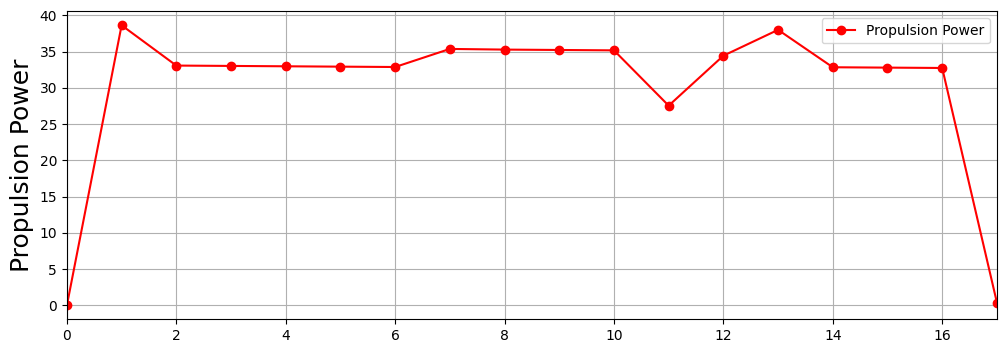

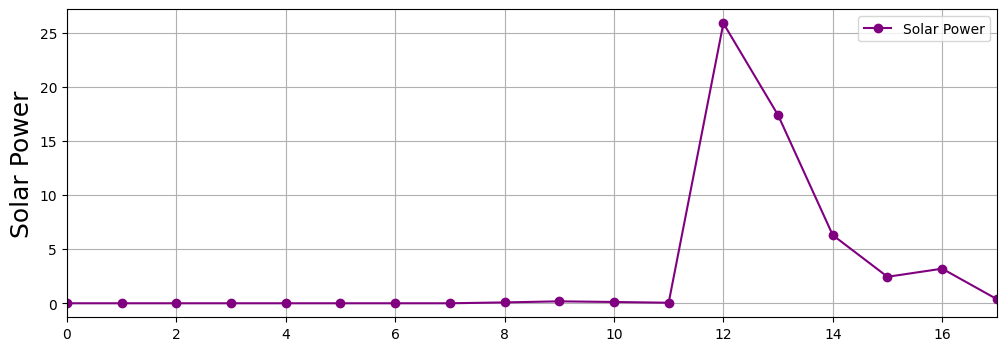

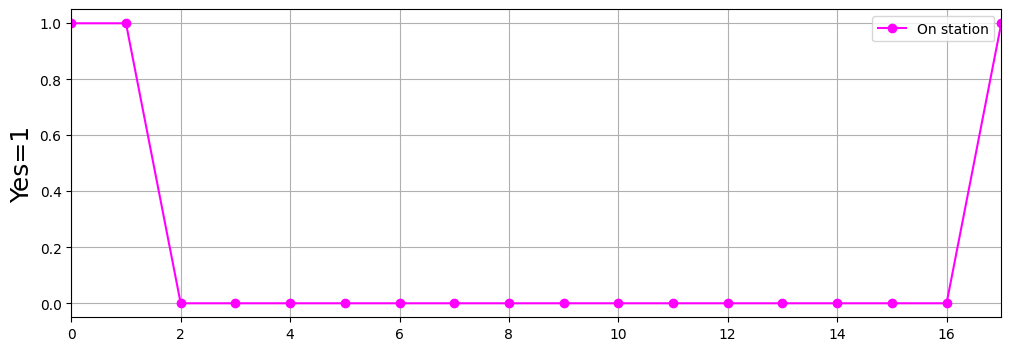

<ipython-input-32-c45ea1cfb6a1>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


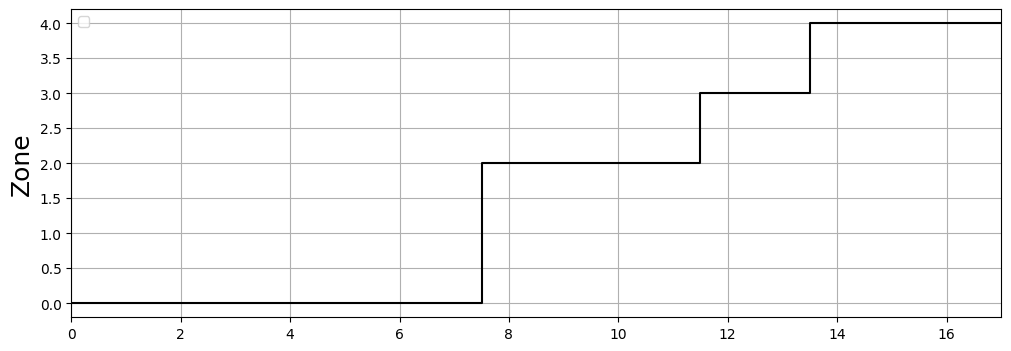

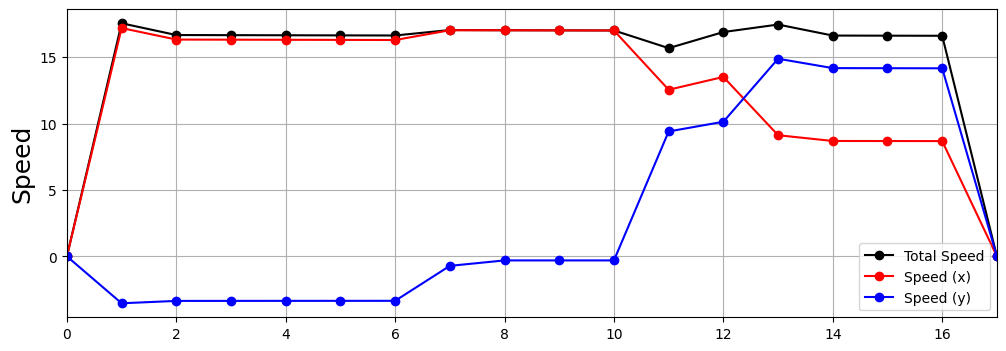

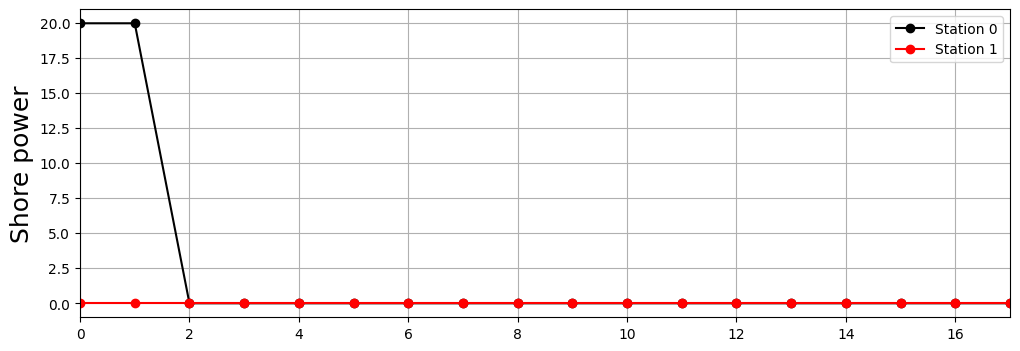

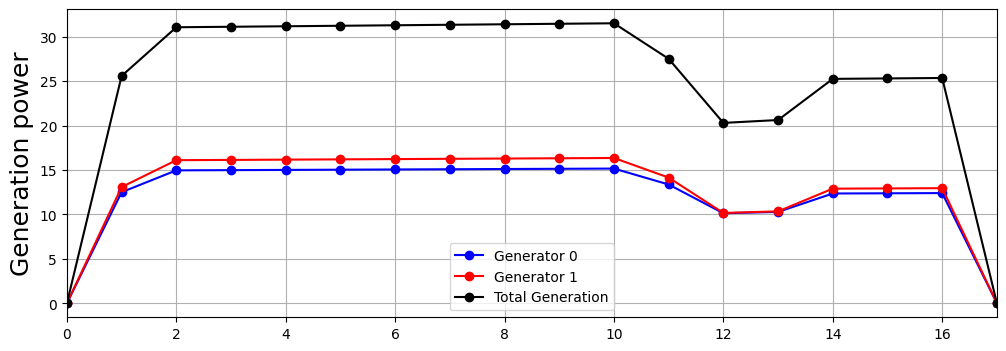

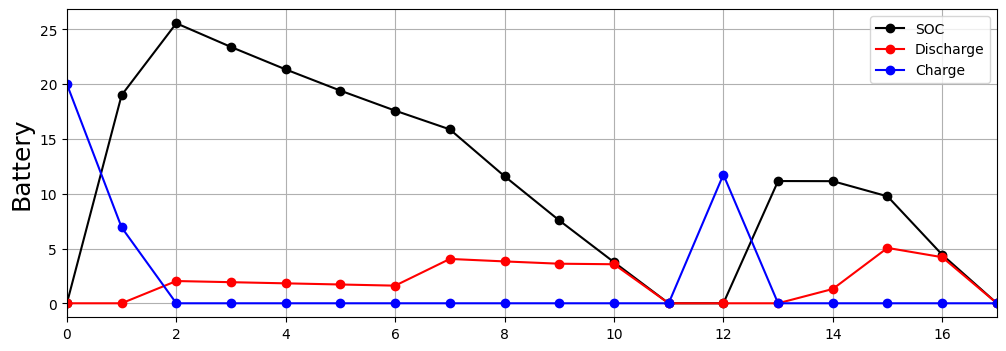

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract optimal values from CVXPY variables
xx_opt = xx.value.flatten()         # x
vx_opt = vx.value.flatten()         # Velocity x
yy_opt = yy.value.flatten()         # y
vy_opt = vy.value.flatten()         # Velocity y
pg0_opt = pg[:,0].value.flatten()   # Generated power 0
pg1_opt = pg[:,1].value.flatten()   # Generated power 1
pm_opt = pm.value.flatten()         # Motor power
pr0_opt = po[:,0].value.flatten()   # Shore power 0
pr1_opt = po[:,1].value.flatten()   # Shore power 1
pv_opt = pv.value.flatten()         # Solar power
s_opt = s.value.flatten()           # Battery storage
y_opt = y.value.flatten()           # Battery discharge
mu_opt = mu.value.flatten()         # Battery charge
zone_opt = zone.value               # Binary matrix for zone tracking
onB = on_borne.value                # Binary matrix tracking to know if you are on a shore power plug
v_opt = np.sqrt(vx_opt**2 + vy_opt**2)

# Determine the zone at each time step
segment_opt = np.argmax(zone_opt, axis=1)

# Time steps
time_steps = np.arange(len(xx_opt))
time_steps = np.arange(len(yy_opt))

# Function to create plots
def plot_variable(time_steps, values, title, ylabel, color, marker='o'):
    plt.figure(figsize=(12, 4))
    plt.plot(time_steps, values, label=title, color=color, marker=marker)
    plt.ylabel(ylabel, fontsize=18)
    #plt.title(title, fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

# Plot each variable
plot_variable(time_steps, pm_opt, "Propulsion Power", "Propulsion Power", "red")
plot_variable(time_steps, pv_opt, "Solar Power", "Solar Power", "purple")
plot_variable(time_steps, np.sum(onB,axis=1), "On station", "Yes=1", "magenta")


# Plot Segment Index
plt.figure(figsize=(12, 4))
plt.step(time_steps, segment_opt, color='black', where='mid')
plt.ylabel("Zone", fontsize=18)
#plt.title("Zone dans laquelle le navire est", fontsize=22)
plt.grid(True)
plt.legend()
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()


#Vitesse
plt.figure(figsize=(12, 4))
plt.plot(time_steps, v_opt, label="Total Speed", color='black', marker='o')
plt.plot(time_steps, vx_opt, label="Speed (x)", color='red', marker='o')
plt.plot(time_steps, vy_opt, label="Speed (y)", color='blue', marker='o')
plt.ylabel("Speed", fontsize=18)
#plt.title("Profil de vitesse optimal", fontsize=22)
plt.grid(True)
plt.legend()
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

#Shore Power
plt.figure(figsize=(12, 4))
plt.plot(time_steps, pr0_opt, label="Station 0", color='black', marker='o')
plt.plot(time_steps, pr1_opt, label="Station 1", color='red', marker='o')
plt.ylabel("Shore power", fontsize=18)
#plt.title("Profil de vitesse optimal", fontsize=22)
plt.grid(True)
plt.legend()
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

#Generation
plt.figure(figsize=(12, 4))
plt.plot(time_steps, pg0_opt, label="Generator 0", color='blue', marker='o')
plt.plot(time_steps, pg1_opt, label="Generator 1", color='red', marker='o')
plt.plot(time_steps, pg1_opt+pg0_opt, label="Total Generation", color='black', marker='o')
plt.ylabel("Generation power", fontsize=18)
#plt.title("Profil de vitesse optimal", fontsize=22)
plt.grid(True)
plt.legend()
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

#Batterie
plt.figure(figsize=(12, 4))
plt.plot(time_steps, s_opt, label="SOC", color='black', marker='o')
plt.plot(time_steps, y_opt, label="Discharge", color='red', marker='o')
plt.plot(time_steps, mu_opt, label="Charge", color='blue', marker='o')
plt.ylabel("Battery", fontsize=18)
#plt.title("Batterie", fontsize=22)
plt.grid(True)
plt.legend()
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()



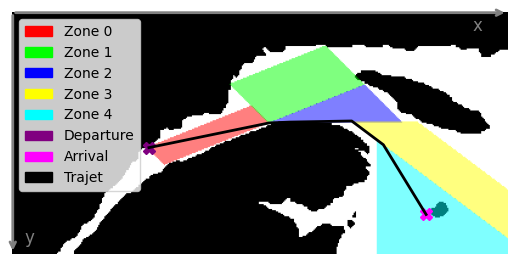

In [ ]:
# Plot with legend
fig, ax = plt.subplots()
ax.imshow(rgb_image, origin='upper')
ax.axis("off")

# Plot departure and arrival points
ax.plot(departure_x, departure_y, marker='X', color='purple', markersize=8, label='Departure')
ax.plot(arrival_x, arrival_y, marker='X', color='magenta', markersize=8, label='Arrival')
ax.plot(xx_opt, yy_opt, color='black', linewidth=2, label='Trajet')

# Get image dimensions
img_height, img_width = rgb_image.shape[0], rgb_image.shape[1]

# Full-span x-axis arrow (horizontal along top)
ax.annotate('', xy=(img_width - 1, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='gray', lw=2))
ax.text(img_width - 30, 15, 'x', color='gray', fontsize=12)

# Full-span y-axis arrow (vertical along left)
ax.annotate('', xy=(0, img_height - 1), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='gray', lw=2))
ax.text(10, img_height - 10, 'y', color='gray', fontsize=12)

# Create legend patches for zones
patches = [
    mpatches.Patch(color=np.array(color)/255.0, label=f'Zone {label}')
    for label, color in zone_colors.items()
]

patches.append(mpatches.Patch(color='purple', label='Departure'))
patches.append(mpatches.Patch(color='magenta', label='Arrival'))
patches.append(mpatches.Patch(color='black', label='Trajet'))

plt.legend(handles=patches, loc='upper left', framealpha=0.8)
plt.show()


# Simulation : function definition and sanity check on one time step

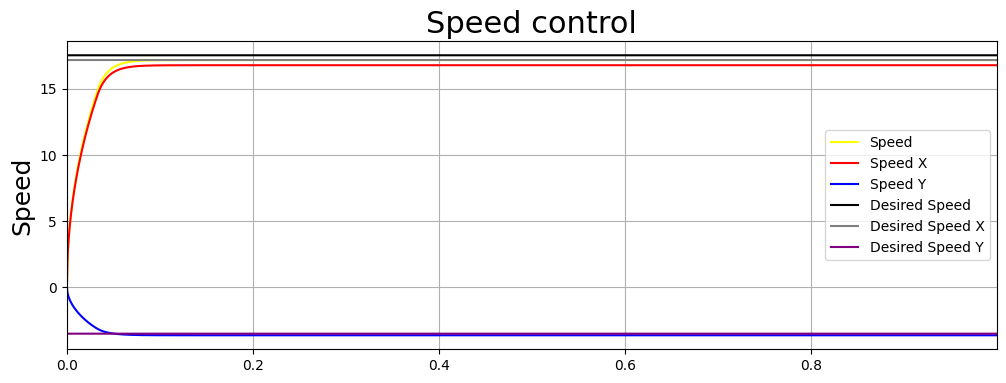

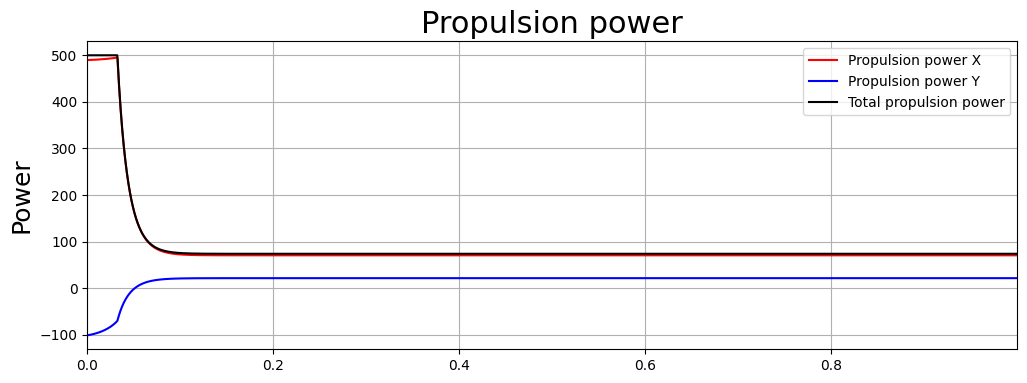

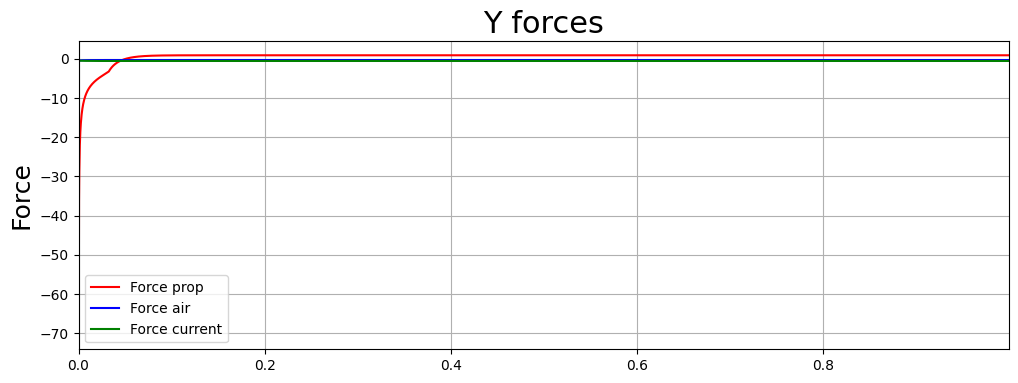

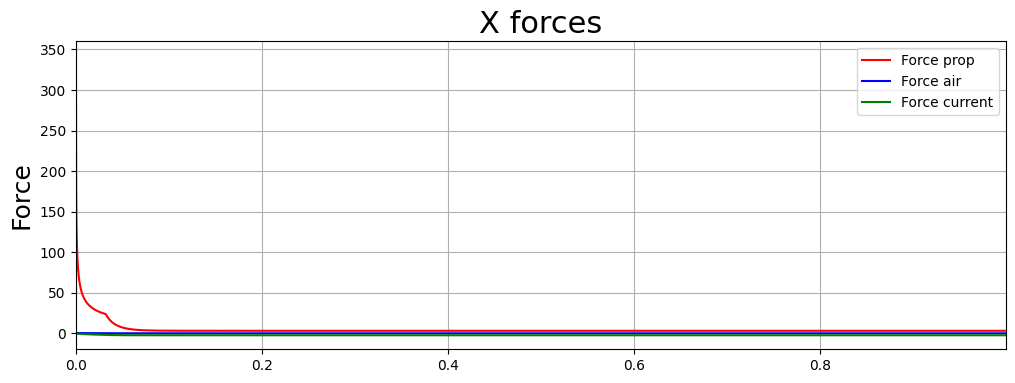

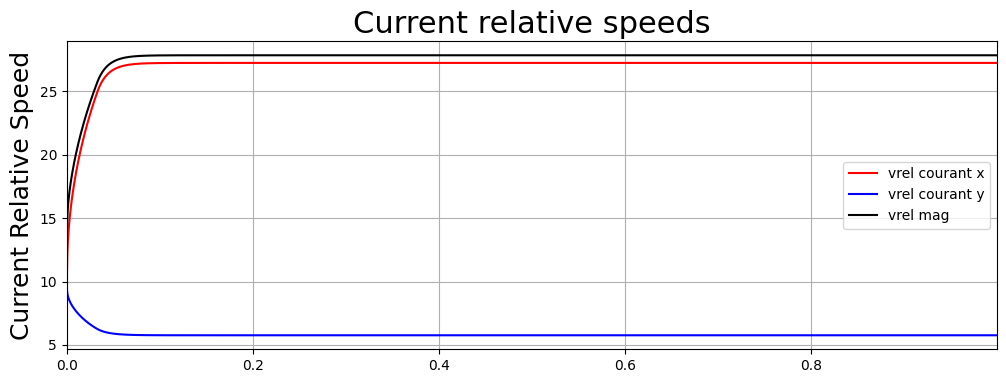

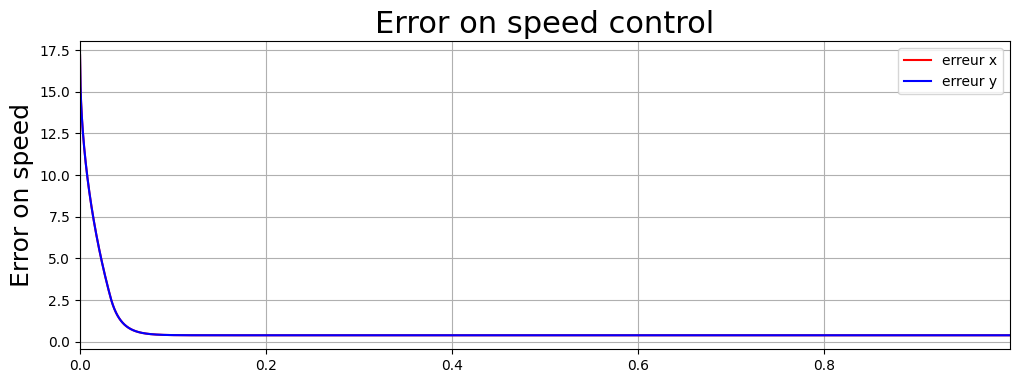

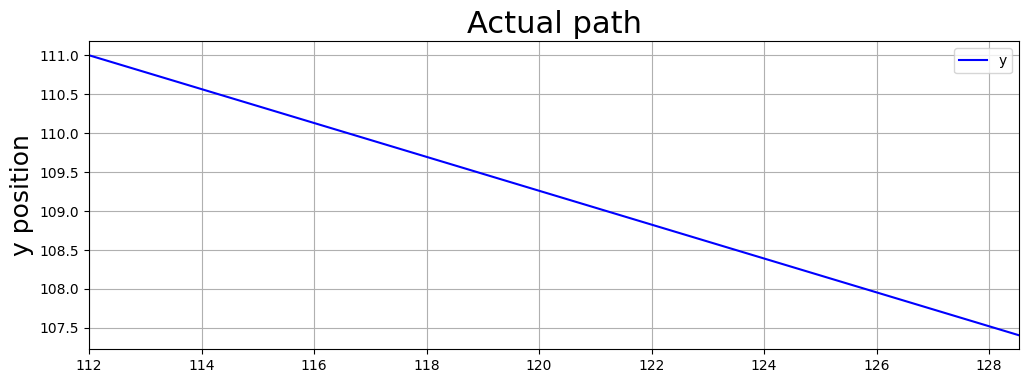

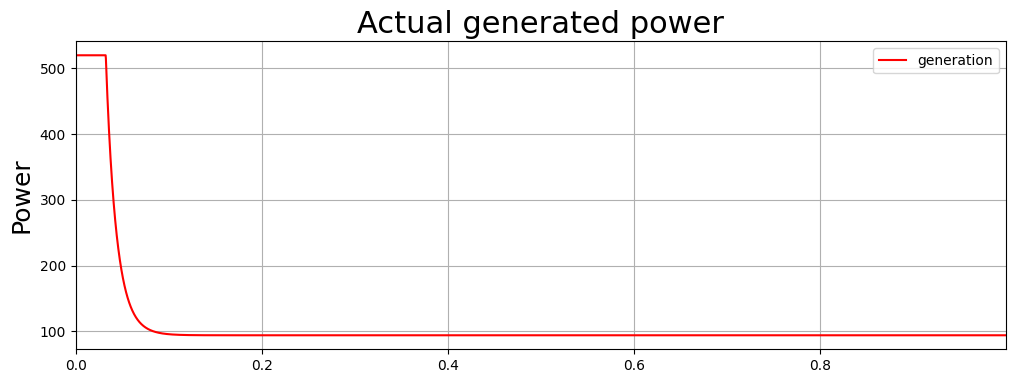

[128.53201258 107.40435153]
[16.79545683 -3.65351622]
10650.592471438216


In [ ]:
#air and water friction coefficients breakdown
Fa = F*0.3
Fc = F*0.7

#meteo in the zone and timestep of interest
v_wind = np.array([meteo_data[0,0,wind_speed_X],meteo_data[0,0,wind_speed_Y]])
v_current = np.array([meteo_data[0,0,current_speed_X],meteo_data[0,0,current_speed_Y]])

#desired speed
v_des = np.array([vx_opt[1],vy_opt[1]])
v_des_magn = np.linalg.norm(v_des)

#power from non generation sources
Pv = pv_opt[0]
Py = y_opt[0]
Pmu = mu_opt[0]

#vector variables
timstep = 1/3600 #h

#speed PID controler
Kp = 150
Ki = 30
Kd = 0

start_point = np.array([xx_opt[0],yy_opt[0]])
start_speed = np.array([vx_opt[0],vy_opt[0]])

#function definition
def compute_costs_position(start_point, start_speed, v_des, Fa,Fc,v_wind,v_current,Pv,Py,Pmu,timstep,delta,eff_motors,Kp,Ki,Kd,generatePlots = False):

  #variable definition
  time_vect = np.arange(0,delta,timstep)

  v_magn = np.zeros(len(time_vect))
  v = np.zeros((2,len(time_vect))) #x = 0, y=1
  d = np.zeros((2,len(time_vect))) #x = 0, y=1

  v_rel_wind = np.zeros((2,len(time_vect)))
  v_rel_wind_mag = np.zeros(len(time_vect))
  v_rel_current = np.zeros((2,len(time_vect)))
  v_rel_current_mag = np.zeros(len(time_vect))

  pp = np.zeros((2,len(time_vect)))
  pp_magn = np.zeros(len(time_vect))
  pp_theta = np.zeros(len(time_vect))

  Force_air = np.zeros((2,len(time_vect)))
  Force_current = np.zeros((2,len(time_vect)))
  Force_propulsion = np.zeros((2,len(time_vect)))

  err_px = np.zeros(len(time_vect))
  err_ix = np.zeros(len(time_vect))
  err_dx = np.zeros(len(time_vect))
  err_py = np.zeros(len(time_vect))
  err_iy = np.zeros(len(time_vect))
  err_dy = np.zeros(len(time_vect))

  generation_power = np.zeros(len(time_vect))


  #initialization
  d[0,0] = start_point[0]
  d[1,0] = start_point[1]
  v[0,0] = start_speed[0]
  v[1,0] = start_speed[1]
  v_magn[0] = np.linalg.norm(v[:,0])
  v_des_magn = np.linalg.norm(v_des)

  err_px[0] = v_des[0] - v[0,0]
  err_ix[0] = err_px[0]
  err_dx[0] = 0
  err_py[0] = v_des[1] - v[1,0]
  err_iy[0] = err_py[0]
  err_dy[0] = 0

  pp[0,0] = err_px[0]*Kp + err_ix[0]*Ki + err_dx[0]*Kd
  pp[1,0] = err_py[0]*Kp + err_iy[0]*Ki + err_dy[0]*Kd
  pp_magn[0] = np.linalg.norm(pp[:,0])
  pp_theta[0] = np.arctan2(pp[1,0],pp[0,0])

  if pp_magn[0] < pm_min :
    pp_magn[0] = pm_min
    pp[0,0] = pm_min*np.cos(pp_theta[0])
    pp[1,0] = pm_min*np.sin(pp_theta[0])

  if pp_magn[0] > pm_max :
    pp_magn[0] = pm_max
    pp[0,0] = pm_max*np.cos(pp_theta[0])
    pp[1,0] = pm_max*np.sin(pp_theta[0])

  generation_power[0] = pp_magn[0] - Pv - Py + Pmu

  if v_magn[0] > 1:
    Force_propulsion[0,0] = eff_motors*pp[0,0]/v_magn[0]
    Force_propulsion[1,0] = eff_motors*pp[1,0]/v_magn[0]
  else:
    Force_propulsion[0,0] = eff_motors*pp[0,0]
    Force_propulsion[1,0] = eff_motors*pp[1,0]

  v_rel_wind[:,0] = v[:,0]-v_wind
  v_rel_wind_mag[0] = np.linalg.norm(v_rel_wind[:,0])
  Force_air[:,0] = Fa*(v_rel_wind[:,0]/v_rel_wind_mag[0])*v_rel_wind_mag[0]**2
  if np.isnan(Force_air[:,0]).any():
    Force_air[0,0] = 0
    Force_air[1,0] = 0

  v_rel_current[:,0] = v[:,0]-v_current
  v_rel_current_mag[0] = np.linalg.norm(v_rel_current[:,0])
  Force_current[:,0] = Fc*(v_rel_current[:,0]/v_rel_current_mag[0])*v_rel_current_mag[0]**2
  if np.isnan(Force_current[:,0]).any():
    Force_current[0,0] = 0
    Force_current[1,0] = 0


  for i in range(1,len(time_vect)):
    #position update
    d[0,i] = d[0,i-1] + v[0,i-1]*timstep
    d[1,i] = d[1,i-1] + v[1,i-1]*timstep

    #speed update based on computed acceleration
    v[:,i] = v[:,i-1] + timstep*(Force_propulsion[:,i-1]+Force_air[:,i-1]+Force_current[:,i-1])/mass
    v_magn[i] = np.linalg.norm(v[:,i])

    #Controler command to offset error
    err_px[i] = v_des[0] - v[0,i]
    err_ix[i] = err_px[i]
    err_dx[i] = err_px[i] - err_px[i-1]
    err_py[i] = v_des[1] - v[1,i]
    err_iy[i] = err_py[i]
    err_dy[i] = err_py[i] - err_py[i-1]

    pp[0,i] = err_px[i]*Kp + err_ix[i]*Ki + err_dx[i]*Kd
    pp[1,i] = err_py[i]*Kp + err_iy[i]*Ki + err_dy[i]*Kd
    pp_magn[i] = np.linalg.norm(pp[:,i])
    pp_theta[i] = np.arctan2(pp[1,i],pp[0,i])

    #commands cannot be outside operation limits
    if pp_magn[i] < pm_min :
      pp_magn[i] = pm_min
      pp[0,i] = pm_min*np.cos(pp_theta[i])
      pp[1,i] = pm_min*np.sin(pp_theta[i])

    if pp_magn[i] > pm_max :
      pp_magn[i] = pm_max
      pp[0,i] = pm_max*np.cos(pp_theta[i])
      pp[1,i] = pm_max*np.sin(pp_theta[i])

    #generation is equal to propulsion power minus provided power by battery and solar
    generation_power[i] = pp_magn[i] - Pv - Py + Pmu

    #compute propulsion force for next timestep based on command and ship speed
    if v_magn[i] > 1:
      Force_propulsion[0,i] = eff_motors*pp[0,i]/v_magn[i]
      Force_propulsion[1,i] = eff_motors*pp[1,i]/v_magn[i]
    else:
      Force_propulsion[0,i] = eff_motors*pp[0,i]
      Force_propulsion[1,i] = eff_motors*pp[1,i]

    #compute wind force for next timestep based on meteo and ship speed
    v_rel_wind[:,i] = v[:,i]-v_wind
    if (np.isnan(v_rel_wind[:,i]).any() | np.isinf(v_rel_wind[:,i]).any()):
      v_rel_wind[0,i] = 0
      v_rel_wind[1,i] = 0
      v_rel_wind_mag[i] = 0
    else :
      v_rel_wind_mag[i] = np.linalg.norm(v_rel_wind[:,i])

    if (np.isnan(v_rel_wind_mag[i]) | np.isinf(v_rel_wind_mag[i])):
      v_rel_wind_mag[i] = 0

    if v_rel_wind_mag[i] > 1e-2:
      Force_air[:,i] = -Fa*v_rel_wind[:,i]*(v_rel_wind_mag[i]**2)/v_rel_wind_mag[i]
    else :
      Force_air[0,i] = 0
      Force_air[1,i] = 0
    if (np.isnan(Force_air[:,i]).any() | np.isnan(Force_air[:,i]).any()):
      Force_air[0,i] = 0
      Force_air[1,i] = 0

    #compute current force for next timestep based on meteo and ship speed
    v_rel_current[:,i] = v[:,i]-v_current
    v_rel_current_mag[i] = np.linalg.norm(v_rel_current[:,i])
    if v_rel_current_mag[i] > 1e-2:
      Force_current[:,i] = -Fc*(v_rel_current[:,i]/v_rel_current_mag[i])*v_rel_current_mag[i]**2
    else:
      Force_current[0,i] = 0
      Force_current[1,i] = 0

    if np.isnan(Force_current[:,i]).any():
      Force_current[0,i] = 0
      Force_current[1,i] = 0

  #prepare output variables
  final_position = np.array([d[0,-1],d[1,-1]])
  final_speed = np.array([v[0,-1],v[1,-1]])
  total_cost = timstep*np.sum(0.5*(a[0]+a[1])*np.square(generation_power)+0.5*(b[0]+b[1])*generation_power+c[0]+c[1])

  if generatePlots:
    plt.figure(figsize=(12, 4))
    plt.plot(time_vect, v_magn, label="Speed", color='yellow')
    plt.plot(time_vect, v[0,:], label="Speed X", color='red')
    plt.plot(time_vect, v[1,:], label="Speed Y", color='blue')
    plt.plot(time_vect, np.ones(len(time_vect))*v_des_magn, label="Desired Speed", color='black')
    plt.plot(time_vect, np.ones(len(time_vect))*v_des[0], label="Desired Speed X", color='grey')
    plt.plot(time_vect, np.ones(len(time_vect))*v_des[1], label="Desired Speed Y", color='purple')
    plt.ylabel("Speed", fontsize=18)
    plt.title("Speed control", fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(time_vect, pp[0,:], label="Propulsion power X", color='red')
    plt.plot(time_vect, pp[1,:], label="Propulsion power Y", color='blue')
    plt.plot(time_vect, pp_magn, label="Total propulsion power", color='black')
    plt.ylabel("Power", fontsize=18)
    plt.title("Propulsion power", fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(time_vect, Force_propulsion[1,:], label="Force prop", color='red')
    plt.plot(time_vect, Force_air[1,:], label="Force air", color='blue')
    plt.plot(time_vect, Force_current[1,:], label="Force current", color='green')
    plt.ylabel("Force", fontsize=18)
    plt.title("Y forces", fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(time_vect, Force_propulsion[0,:], label="Force prop", color='red')
    plt.plot(time_vect, Force_air[0,:], label="Force air", color='blue')
    plt.plot(time_vect, Force_current[0,:], label="Force current", color='green')
    plt.ylabel("Force", fontsize=18)
    plt.title("X forces", fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(time_vect, v_rel_current[0,:], label="vrel courant x", color='red')
    plt.plot(time_vect, v_rel_current[1,:], label="vrel courant y", color='blue')
    plt.plot(time_vect, v_rel_current_mag, label="vrel mag", color='black')
    plt.ylabel("Current Relative Speed", fontsize=18)
    plt.title("Current relative speeds", fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(time_vect, err_px, label="erreur x", color='red')
    plt.plot(time_vect, err_px, label="erreur y", color='blue')
    plt.ylabel("Error on speed", fontsize=18)
    plt.title("Error on speed control", fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(d[0,:], d[1,:], label="y", color='blue')
    plt.ylabel("y position", fontsize=18)
    plt.title("Actual path", fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(time_vect, generation_power, label="generation", color='red')
    plt.ylabel("Power", fontsize=18)
    plt.title("Actual generated power", fontsize=22)
    plt.grid(True)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.show()

  return final_position, final_speed, total_cost



final_position, final_speed, total_cost = compute_costs_position(start_point, start_speed, v_des, Fa,Fc,v_wind,v_current,Pv,Py,Pmu,timstep,delta,eff_motors,Kp,Ki,Kd,generatePlots = True)
print(final_position)
print(final_speed)
print(total_cost)



# Simulation : Rolling window with optimization problem
1. Define the optimization problem as a function

In [ ]:
def optimize(T,start_point_t, start_speed,meteo_data,arrival_x,arrival_y,lambda_array,sigma_array,G,O,nb_zones,terminals,a,b,c,delta,shore_power_cost,max_shore_power,speed_tol,eff_discharge,eff_charge,leak_battery,M,rampe_min,rampe_max,area_solar,eff_solar,direct_radiation_idx,eff_motors,generatePlots = False):
 #Variables
  pg = cp.Variable((T,G))   # Fossil generation
  po = cp.Variable((T,O))   # Shore Power
  pv = cp.Variable((T,1))   # Solar Power
  pm = cp.Variable((T,1))   # Propulsion Power
  s = cp.Variable((T,1))    # SOC
  y = cp.Variable((T,1))    # Onboard battery discharge
  mu = cp.Variable((T,1))   # Onboard battery discharge
  vx = cp.Variable((T,1))   # Speed in the x axis
  vy = cp.Variable((T,1))   # Speed in the y axis
  xx = cp.Variable((T,1))   # Position in the x axis
  yy = cp.Variable((T,1))   # Position in the y axis
  zone = cp.Variable((T,nb_zones),boolean=True)             # Current Zone
  on_borne = cp.Variable((T,len(terminals)),boolean=True)   # Currently on terminal b

  #Objective
  cost = 0
  for t in range(T):
    for g in range(G) :
        cost +=  (a[g]*cp.square(pg[t,g]) + b[g]*pg[t,g] + c[g])*delta
    for o in range(O):
      cost += shore_power_cost[o]*po[t,o]*delta

  #Constraints
  constraints=[]
  for t in range(T): #power balance
    constraints += [cp.sum(pg[t,:])==pm[t]-cp.sum(po[t,:])-pv[t]-y[t]+mu[t]]


  for t in range(T): #shore power
    for i in range(len(terminals)):
      constraints += [po[t,i]>=0]
      constraints += [po[t,i]<=max_shore_power[i]]
      constraints += [on_borne[t,i]<=(M-cp.abs(xx[t]-terminals[i][1]))/M ]
      constraints += [on_borne[t,i]<=(M-cp.abs(yy[t]-terminals[i][0]))/M ]
      constraints += [on_borne[t,i]<=(M-cp.abs(vx[t])/M) + speed_tol]
      constraints += [on_borne[t,i]<=(M-cp.abs(vy[t])/M) + speed_tol]
      constraints += [po[t,i]<=M*on_borne[t,i]]

  for t in range(1,T): #battery
    constraints += [s[t]==leak_battery*s[t-1]-y[t-1]*delta/eff_discharge + eff_charge*delta*(mu[t-1])]
  constraints += [s[0]==0]
  constraints += [s[T-1]>=0]
  constraints += [mu[T-1]==0]
  constraints += [y[T-1]==0]


  #Path
  constraints += [vx[0]==start_speed[0]]
  constraints += [vx[T]==0]
  constraints += [vy[0]==start_speed[1]]
  constraints += [vy[T]==0]

  for t in range(1,T):
    constraints += [xx[t]==xx[t-1]+vx[t-1]*delta]
    constraints += [yy[t]==yy[t-1]+vy[t-1]*delta]
    constraints += [vx[t]>=vx[t-1]+rampe_min]
    constraints += [vy[t]<=vy[t-1]+rampe_max]

  for t in range(2,T): #zones : relaxation that the 2 first positions don't have to be in one of the convex zones in case the controller went outside the zones. It makes the problem infeasible because we force its initial position outisde the zones
    constraints +=[cp.sum(zone[t,:])==1]
    for z in range(nb_zones):
      constraints += [lambda_array[0,0,z]*yy[t] + lambda_array[1,0,z]*xx[t] + lambda_array[2,0,z]>=-M*(1-zone[t,z])]
      constraints += [lambda_array[0,1,z]*yy[t] + lambda_array[1,1,z]*xx[t] + lambda_array[2,1,z]>=-M*(1-zone[t,z])]
      constraints += [lambda_array[0,2,z]*yy[t] + lambda_array[1,2,z]*xx[t] + lambda_array[2,2,z]>=-M*(1-zone[t,z])]
      constraints += [lambda_array[0,3,z]*yy[t] + lambda_array[1,3,z]*xx[t] + lambda_array[2,3,z]>=-M*(1-zone[t,z])]

  for t in range(2,T): #transitions
    for z in range(1,nb_zones):
      constraints += [sigma_array[0,0,z-1,z]*yy[t] + sigma_array[1,0,z-1,z]*xx[t] + sigma_array[2,0,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,1,z-1,z]*yy[t] + sigma_array[1,1,z-1,z]*xx[t] + sigma_array[2,1,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,2,z-1,z]*yy[t] + sigma_array[1,2,z-1,z]*xx[t] + sigma_array[2,2,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,3,z-1,z]*yy[t] + sigma_array[1,3,z-1,z]*xx[t] + sigma_array[2,3,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]

      constraints += [sigma_array[0,0,z-1,z]*yy[t-1] + sigma_array[1,0,z-1,z]*xx[t-1] + sigma_array[2,0,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,1,z-1,z]*yy[t-1] + sigma_array[1,1,z-1,z]*xx[t-1] + sigma_array[2,1,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,2,z-1,z]*yy[t-1] + sigma_array[1,2,z-1,z]*xx[t-1] + sigma_array[2,2,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,3,z-1,z]*yy[t-1] + sigma_array[1,3,z-1,z]*xx[t-1] + sigma_array[2,3,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]

  constraints += [xx[0]==start_point_t[0]]
  constraints += [yy[0]==start_point_t[1]]
  constraints += [xx[T-1]==arrival_x]
  constraints += [yy[T-1]==arrival_y]

  for t in range(T): #Solar
    constraints += [pv[t]==area_solar*eff_solar*(zone[t,:]@meteo_data[:,t,direct_radiation_idx])/200]

  for t in range(T): #Ship's dynamics
    constraints += [pm[t]>=F*(cp.power(cp.square(vx[t]) + cp.square(vy[t]),1.5))/eff_motors]


  for t in range(T): #max min capacities
    for g in range(G):
      constraints += [pg[t,g]>=0,pg[t,g]<=pg_max[g]]
    constraints += [pm[t]>=pm_min,pm[t]<=pm_max]
    constraints += [y[t]>=y_min,y[t]<=y_max]
    constraints += [mu[t] >= mu_min, mu[t]<= mu_max]
    constraints += [s[t]>=s_min,s[t]<=s_max]
    constraints += [cp.square(vx[t]) + cp.square(vy[t]) <=cp.square(v_max)]

  problem = cp.Problem(cp.Minimize(cost), constraints)
  problem.solve(solver='MOSEK', verbose=True)

  #meteo in the zone and timestep of interest
  v_wind = np.array([meteo_data[0,0,wind_speed_X],meteo_data[0,0,wind_speed_Y]])
  v_current = np.array([meteo_data[0,0,current_speed_X],meteo_data[0,0,current_speed_Y]])

  #desired speed
  v_des = np.array([vx_opt[1],vy_opt[1]])
  v_des_magn = np.linalg.norm(v_des)

  #power from non generation sources
  Pv = pv_opt[0]
  Py = y_opt[0]
  Pmu = mu_opt[0]

  if generatePlots:
    # Extract optimal values from CVXPY variables
    xx_opt = xx.value.flatten()         # x
    vx_opt = vx.value.flatten()         # Velocity x
    yy_opt = yy.value.flatten()         # y
    vy_opt = vy.value.flatten()         # Velocity y
    pg0_opt = pg[:,0].value.flatten()   # Generated power 0
    pg1_opt = pg[:,1].value.flatten()   # Generated power 1
    pm_opt = pm.value.flatten()         # Motor power
    pr0_opt = po[:,0].value.flatten()   # Shore power 0
    pr1_opt = po[:,1].value.flatten()   # Shore power 1
    pv_opt = pv.value.flatten()         # Solar power
    s_opt = s.value.flatten()           # Battery storage
    y_opt = y.value.flatten()           # Battery discharge
    mu_opt = mu.value.flatten()         # Battery charge
    zone_opt = zone.value               # Binary matrix for zone tracking
    onB = on_borne.value                # Binary matrix tracking to know if you are on a shore power plug
    v_opt = np.sqrt(vx_opt**2 + vy_opt**2)

    # Plot with legend
    fig, ax = plt.subplots()
    ax.imshow(rgb_image, origin='upper')
    ax.axis("off")

    # Plot departure and arrival points
    ax.plot(xx_opt, yy_opt, color='black', linewidth=2, label='Trajet')

    # Get image dimensions
    img_height, img_width = rgb_image.shape[0], rgb_image.shape[1]

    # Full-span x-axis arrow (horizontal along top)
    ax.annotate('', xy=(img_width - 1, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='gray', lw=2))
    ax.text(img_width - 30, 15, 'x', color='gray', fontsize=12)

    # Full-span y-axis arrow (vertical along left)
    ax.annotate('', xy=(0, img_height - 1), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='gray', lw=2))
    ax.text(10, img_height - 10, 'y', color='gray', fontsize=12)

    # Create legend patches for zones
    patches = [
        mpatches.Patch(color=np.array(color)/255.0, label=f'Zone {label}')
        for label, color in zone_colors.items()
    ]

    patches.append(mpatches.Patch(color='purple', label='Departure'))
    patches.append(mpatches.Patch(color='magenta', label='Arrival'))
    patches.append(mpatches.Patch(color='black', label='Trajet'))

    plt.legend(handles=patches, loc='upper left', framealpha=0.8)
    plt.show()
  return v_wind,v_current,Pv,Py,Pmu, v_des,v_des_magn


2. Run the rolling window by itteratively calling optimization and simulation

['CLARABEL', 'CVXOPT', 'GLPK', 'GLPK_MI', 'HIGHS', 'MOSEK', 'OSQP', 'SCIPY', 'SCS']
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:07:57 PM: Your problem has 360 variables, 1536 constraints, and 0 parameters.
(CVXPY) May 04 08:07:57 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:07:57 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:07:57 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:07:57 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------

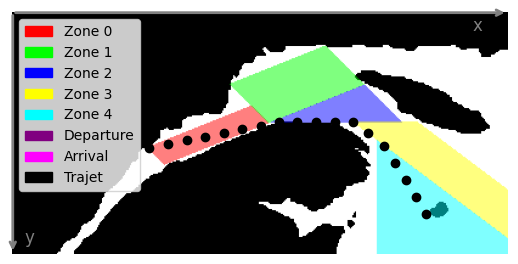

[126.68932796 107.94922853]
[14.87429384 -3.0899868 ]
6777.963486328751
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:14:14 PM: Your problem has 340 variables, 1448 constraints, and 0 parameters.
(CVXPY) May 04 08:14:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:14:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:14:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:14:15 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------------------

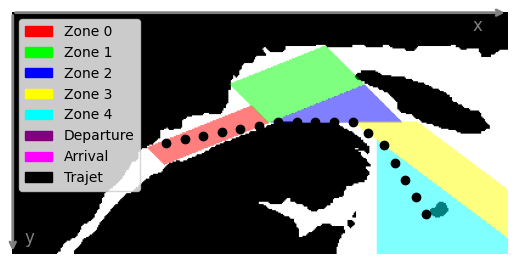

[141.01255864 104.05201281]
[15.02819267 -2.94839417]
9222.796348880192
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:19:11 PM: Your problem has 320 variables, 1360 constraints, and 0 parameters.
(CVXPY) May 04 08:19:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:19:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:19:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:19:11 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------------------

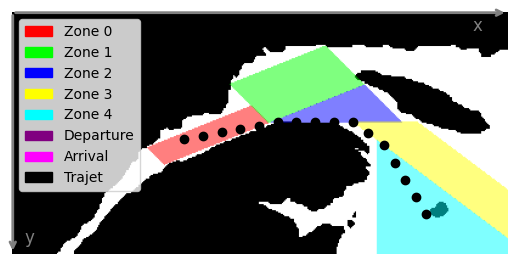

[156.06072139 101.09236413]
[15.06551621 -2.91947641]
11522.800740150338
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:21:19 PM: Your problem has 300 variables, 1272 constraints, and 0 parameters.
(CVXPY) May 04 08:21:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:21:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:21:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:21:20 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------------------------------------------------

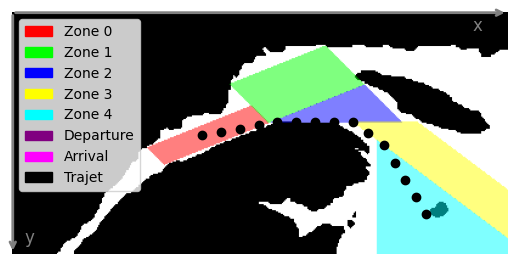

[171.10861012  98.13795351]
[15.11398397 -2.87334594]
13839.060343082318
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:23:39 PM: Your problem has 280 variables, 1184 constraints, and 0 parameters.
(CVXPY) May 04 08:23:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:23:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:23:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:23:39 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------------------------------------------------

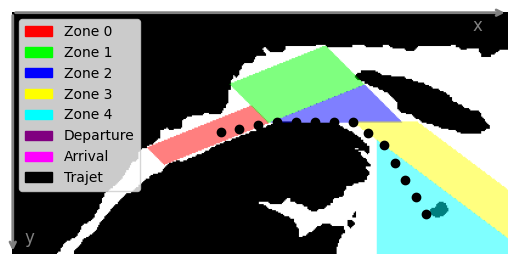

[186.17072409  95.2193713 ]
[15.17684843 -2.79094559]
16178.12447344174
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:24:30 PM: Your problem has 260 variables, 1096 constraints, and 0 parameters.
(CVXPY) May 04 08:24:31 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:24:31 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:24:31 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:24:31 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------------------

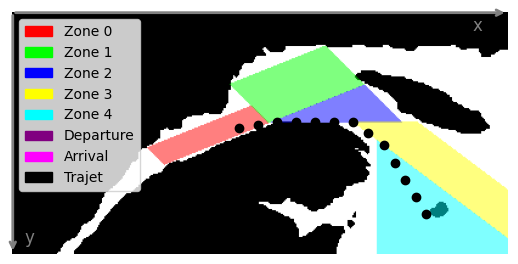

[201.26335509  92.38552253]
[15.27060496 -2.62276585]
18495.529491474408
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:25:17 PM: Your problem has 240 variables, 1008 constraints, and 0 parameters.
(CVXPY) May 04 08:25:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:25:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:25:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:25:17 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------------------------------------------------

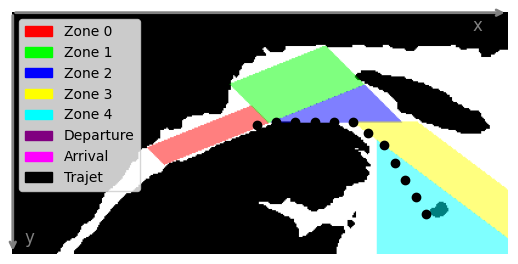

[216.4894732   91.81224832]
[15.49934618 -0.16606543]
21729.289117664524
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:00 PM: Your problem has 220 variables, 920 constraints, and 0 parameters.
(CVXPY) May 04 08:26:00 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:00 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:00 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:00 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------------------

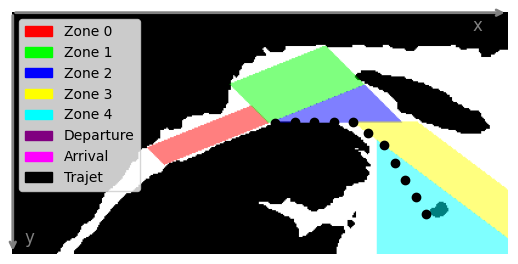

[231.67750631  90.83096893]
[15.6897615  -0.17134254]
24606.758254596443
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:14 PM: Your problem has 200 variables, 832 constraints, and 0 parameters.
(CVXPY) May 04 08:26:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:14 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------------------

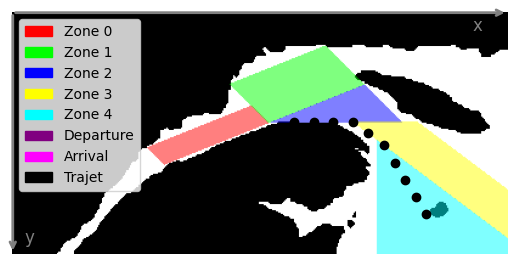

[246.94392593  89.83760215]
[15.95947613 -0.1646869 ]
27616.46278697572
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:29 PM: Your problem has 180 variables, 744 constraints, and 0 parameters.
(CVXPY) May 04 08:26:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:29 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-----------------------------------------------------------------------------

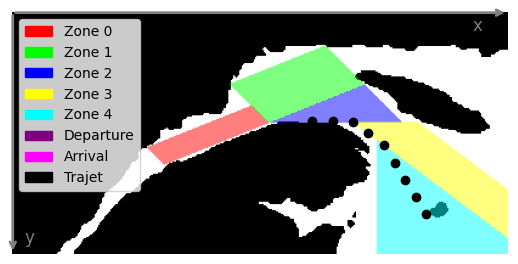

[262.09669914  89.23520457]
[16.1141297   0.23785818]
30179.232097042226
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:35 PM: Your problem has 160 variables, 656 constraints, and 0 parameters.
(CVXPY) May 04 08:26:36 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:36 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:36 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:36 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------------------

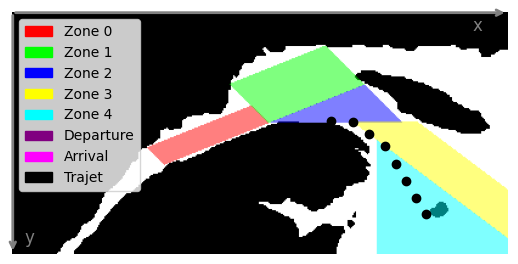

[274.90191161  98.26199475]
[12.83541029  9.49940938]
37402.491895716244
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:41 PM: Your problem has 140 variables, 568 constraints, and 0 parameters.
(CVXPY) May 04 08:26:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:41 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:41 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:41 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------------------------------------------------

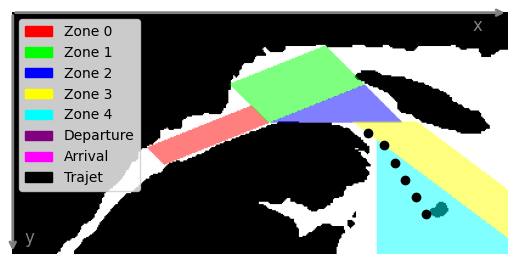

[287.0146994  107.63742825]
[13.03028208  9.64733342]
40381.27532765594
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:44 PM: Your problem has 120 variables, 480 constraints, and 0 parameters.
(CVXPY) May 04 08:26:45 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:45 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:45 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:45 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-----------------------------------------------------------------------------

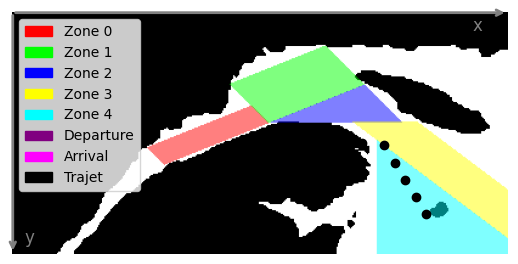

[295.85057049 121.19975349]
[ 8.77688183 14.30414949]
47337.57972589213
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:47 PM: Your problem has 100 variables, 392 constraints, and 0 parameters.
(CVXPY) May 04 08:26:47 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:47 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:47 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:47 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-----------------------------------------------------------------------------

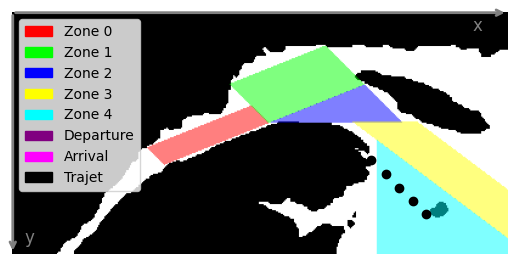

[305.84422833 131.82570699]
[10.88610763 10.78644353]
51579.73398839566
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:49 PM: Your problem has 80 variables, 304 constraints, and 0 parameters.
(CVXPY) May 04 08:26:49 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:49 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:49 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:49 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
------------------------------------------------------------------------------

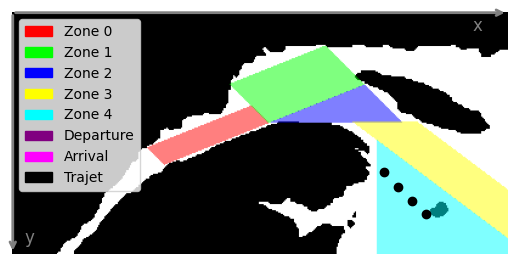

[316.16957642 142.07836178]
[11.18593091 11.09341183]
54887.26242506814
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:51 PM: Your problem has 60 variables, 216 constraints, and 0 parameters.
(CVXPY) May 04 08:26:51 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:51 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:51 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:51 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
------------------------------------------------------------------------------

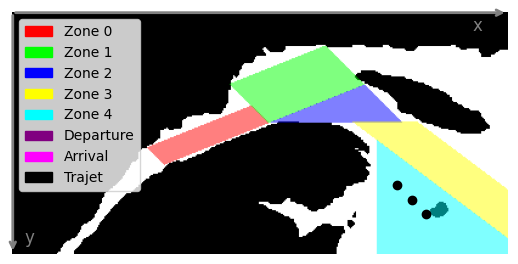

[327.3907461  153.30294888]
[11.39851924 11.30950691]
58413.4674967393
                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 04 08:26:52 PM: Your problem has 40 variables, 128 constraints, and 0 parameters.
(CVXPY) May 04 08:26:52 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 04 08:26:52 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 04 08:26:52 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 04 08:26:52 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------

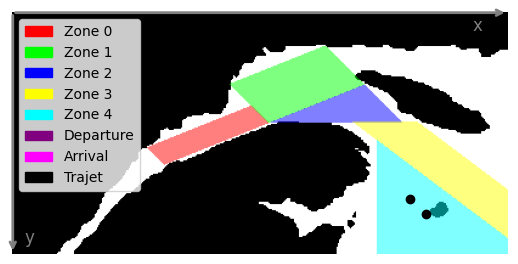

[327.23493779 153.22953432]
[-0.00219653 -0.00564272]
62261.81934465614


In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
print(cp.installed_solvers())
def optimize(T,start_point, start_speed,meteo_data,arrival_x,arrival_y,lambda_array,sigma_array,G,O,nb_zones,terminals,a,b,c,delta,shore_power_cost,max_shore_power,speed_tol,eff_discharge,eff_charge,leak_battery,M,rampe_min,rampe_max,area_solar,eff_solar,direct_radiation_idx,eff_motors,generatePlots = False):
 #Variables
  pg = cp.Variable((T,G))   # Fossil generation
  po = cp.Variable((T,O))   # Shore Power
  pv = cp.Variable((T,1))   # Solar Power
  pm = cp.Variable((T,1))   # Propulsion Power
  s = cp.Variable((T,1))    # SOC
  y = cp.Variable((T,1))    # Onboard battery discharge
  mu = cp.Variable((T,1))   # Onboard battery discharge
  vx = cp.Variable((T,1))   # Speed in the x axis
  vy = cp.Variable((T,1))   # Speed in the y axis
  xx = cp.Variable((T,1))   # Position in the x axis
  yy = cp.Variable((T,1))   # Position in the y axis
  zone = cp.Variable((T,nb_zones),boolean=True)             # Current Zone
  on_borne = cp.Variable((T,len(terminals)),boolean=True)   # Currently on terminal b

  #Objective
  cost = 0
  for t in range(T):
    for g in range(G) :
        cost +=  (a[g]*cp.square(pg[t,g]) + b[g]*pg[t,g] + c[g])*delta
    for o in range(O):
      cost += shore_power_cost[o]*po[t,o]*delta

  #Constraints
  constraints=[]
  for t in range(T): #power balance
    constraints += [cp.sum(pg[t,:])==pm[t]-cp.sum(po[t,:])-pv[t]-y[t]+mu[t]]


  for t in range(T): #shore power
    for i in range(len(terminals)):
      constraints += [po[t,i]>=0]
      constraints += [po[t,i]<=max_shore_power[i]]
      constraints += [on_borne[t,i]<=(M-cp.abs(xx[t]-terminals[i][1]))/M ]
      constraints += [on_borne[t,i]<=(M-cp.abs(yy[t]-terminals[i][0]))/M ]
      constraints += [on_borne[t,i]<=(M-cp.abs(vx[t])/M) + speed_tol]
      constraints += [on_borne[t,i]<=(M-cp.abs(vy[t])/M) + speed_tol]
      constraints += [po[t,i]<=M*on_borne[t,i]]

  for t in range(1,T): #battery
    constraints += [s[t]==leak_battery*s[t-1]-y[t-1]*delta/eff_discharge + eff_charge*delta*(mu[t-1])]
  constraints += [s[0]==0]
  constraints += [s[T-1]>=0]
  constraints += [mu[T-1]==0]
  constraints += [y[T-1]==0]


  #Path
  #for now I need to relax vx[0]==start_speed[0] and vy[0]==start_speed[1] because the PID controller des not exactly follows speed profile which makes start_point infeasible sometimes. If speed cant be controlled to go back in the allowed zone problem is infeasible
  #constraints += [vx[0]==start_speed[0]]
  #constraints += [vy[0]==start_speed[1]]
  constraints += [vx[T-1]==0]
  constraints += [vy[T-1]==0]

  for t in range(1,T):
    constraints += [xx[t]==xx[t-1]+vx[t-1]*delta]
    constraints += [yy[t]==yy[t-1]+vy[t-1]*delta]
    constraints += [vx[t]>=vx[t-1]+rampe_min]
    constraints += [vy[t]<=vy[t-1]+rampe_max]

  for t in range(1,T): #zones for the same reason mentioned in the comment above, start_point can be outside the zones
    constraints +=[cp.sum(zone[t,:])==1]
    for z in range(nb_zones):
      constraints += [lambda_array[0,0,z]*yy[t] + lambda_array[1,0,z]*xx[t] + lambda_array[2,0,z]>=-M*(1-zone[t,z])]
      constraints += [lambda_array[0,1,z]*yy[t] + lambda_array[1,1,z]*xx[t] + lambda_array[2,1,z]>=-M*(1-zone[t,z])]
      constraints += [lambda_array[0,2,z]*yy[t] + lambda_array[1,2,z]*xx[t] + lambda_array[2,2,z]>=-M*(1-zone[t,z])]
      constraints += [lambda_array[0,3,z]*yy[t] + lambda_array[1,3,z]*xx[t] + lambda_array[2,3,z]>=-M*(1-zone[t,z])]

  for t in range(1,T): #transitions
    for z in range(1,nb_zones):
      constraints += [sigma_array[0,0,z-1,z]*yy[t] + sigma_array[1,0,z-1,z]*xx[t] + sigma_array[2,0,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,1,z-1,z]*yy[t] + sigma_array[1,1,z-1,z]*xx[t] + sigma_array[2,1,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,2,z-1,z]*yy[t] + sigma_array[1,2,z-1,z]*xx[t] + sigma_array[2,2,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,3,z-1,z]*yy[t] + sigma_array[1,3,z-1,z]*xx[t] + sigma_array[2,3,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]

      constraints += [sigma_array[0,0,z-1,z]*yy[t-1] + sigma_array[1,0,z-1,z]*xx[t-1] + sigma_array[2,0,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,1,z-1,z]*yy[t-1] + sigma_array[1,1,z-1,z]*xx[t-1] + sigma_array[2,1,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,2,z-1,z]*yy[t-1] + sigma_array[1,2,z-1,z]*xx[t-1] + sigma_array[2,2,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]
      constraints += [sigma_array[0,3,z-1,z]*yy[t-1] + sigma_array[1,3,z-1,z]*xx[t-1] + sigma_array[2,3,z-1,z]>=-M*(2-zone[t,z]-zone[t-1,z-1])]

  constraints += [xx[0]==start_point[0]]
  constraints += [yy[0]==start_point[1]]
  constraints += [xx[T-1]==arrival_x]
  constraints += [yy[T-1]==arrival_y]

  for t in range(T): #Solar
    constraints += [pv[t]==area_solar*eff_solar*(zone[t,:]@meteo_data[:,t,direct_radiation_idx])/200]

  for t in range(T): #Ship's dynamics
    constraints += [pm[t]>=F*(cp.power(cp.square(vx[t]) + cp.square(vy[t]),1.5))/eff_motors]


  for t in range(T): #max min capacities
    for g in range(G):
      constraints += [pg[t,g]>=0,pg[t,g]<=pg_max[g]]
    constraints += [pm[t]>=pm_min,pm[t]<=pm_max]
    constraints += [y[t]>=y_min,y[t]<=y_max]
    constraints += [mu[t] >= mu_min, mu[t]<= mu_max]
    constraints += [s[t]>=s_min,s[t]<=s_max]
    constraints += [cp.square(vx[t]) + cp.square(vy[t]) <=cp.square(v_max)]

  problem = cp.Problem(cp.Minimize(cost), constraints)
  problem.solve(solver='MOSEK', verbose=True)

  # Extract optimal values from CVXPY variables
  xx_opt = xx.value.flatten()         # x
  vx_opt = vx.value.flatten()         # Velocity x
  yy_opt = yy.value.flatten()         # y
  vy_opt = vy.value.flatten()         # Velocity y
  pg0_opt = pg[:,0].value.flatten()   # Generated power 0
  pg1_opt = pg[:,1].value.flatten()   # Generated power 1
  pm_opt = pm.value.flatten()         # Motor power
  pr0_opt = po[:,0].value.flatten()   # Shore power 0
  pr1_opt = po[:,1].value.flatten()   # Shore power 1
  pv_opt = pv.value.flatten()         # Solar power
  s_opt = s.value.flatten()           # Battery storage
  y_opt = y.value.flatten()           # Battery discharge
  mu_opt = mu.value.flatten()         # Battery charge
  zone_opt = zone.value               # Binary matrix for zone tracking
  onB = on_borne.value                # Binary matrix tracking to know if you are on a shore power plug
  v_opt = np.sqrt(vx_opt**2 + vy_opt**2)

  #meteo in the zone and timestep of interest
  v_wind = np.array([meteo_data[0,0,wind_speed_X],meteo_data[0,0,wind_speed_Y]])
  v_current = np.array([meteo_data[0,0,current_speed_X],meteo_data[0,0,current_speed_Y]])

  #desired speed
  v_des = np.array([vx_opt[1],vy_opt[1]])
  v_des_magn = np.linalg.norm(v_des)

  #power from non generation sources
  Pv = pv_opt[0]
  Py = y_opt[0]
  Pmu = mu_opt[0]

  if generatePlots:

    # Plot with legend
    fig, ax = plt.subplots()
    ax.imshow(rgb_image, origin='upper')
    ax.axis("off")

    # Plot departure and arrival points
    ax.scatter(xx_opt, yy_opt, color='black', label='Trajet')

    # Get image dimensions
    img_height, img_width = rgb_image.shape[0], rgb_image.shape[1]

    # Full-span x-axis arrow (horizontal along top)
    ax.annotate('', xy=(img_width - 1, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='gray', lw=2))
    ax.text(img_width - 30, 15, 'x', color='gray', fontsize=12)

    # Full-span y-axis arrow (vertical along left)
    ax.annotate('', xy=(0, img_height - 1), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='gray', lw=2))
    ax.text(10, img_height - 10, 'y', color='gray', fontsize=12)

    # Create legend patches for zones
    patches = [
        mpatches.Patch(color=np.array(color)/255.0, label=f'Zone {label}')
        for label, color in zone_colors.items()
    ]

    patches.append(mpatches.Patch(color='purple', label='Departure'))
    patches.append(mpatches.Patch(color='magenta', label='Arrival'))
    patches.append(mpatches.Patch(color='black', label='Trajet'))

    plt.legend(handles=patches, loc='upper left', framealpha=0.8)
    plt.show()
  return v_wind,v_current,Pv,Py,Pmu, v_des,v_des_magn

start_point = np.array([departure_x,departure_y])
#start_point = np.array([217.42223101,91.05768706])
start_speed = np.array([0,0])
actual_path = np.zeros((2,T))
costs = 0
for i in range(0,T-1):
  v_wind,v_current,Pv,Py,Pmu, v_des,v_des_magn = optimize(T-i,start_point, start_speed, meteo_data[:, i:, :], arrival_x,arrival_y,lambda_array,sigma_array,G,O,nb_zones,terminals,a,b,c,delta,shore_power_cost,max_shore_power,speed_tol,eff_discharge,eff_charge,leak_battery,M,rampe_min,rampe_max,area_solar,eff_solar,direct_radiation_idx,eff_motors,generatePlots = True)
  final_position, final_speed, total_cost = compute_costs_position(start_point, start_speed, v_des, Fa,Fc,v_wind,v_current,Pv,Py,Pmu,timstep,delta,eff_motors,Kp,Ki,Kd,generatePlots = False)
  start_point[0] = final_position[0]
  start_point[1] = final_position[1]
  start_speed[0] = final_speed[0]
  start_speed[1] = final_speed[1]
  costs = costs + total_cost
  actual_path[:,i] = final_position
  print(final_position)
  print(final_speed)
  print(costs)

costs = costs + np.sum(shore_power_cost[0]*pr0_opt*delta)+np.sum(shore_power_cost[1]*pr1_opt*delta)



# Constant speed shortest path : estimate costs with simulation
1. Definition of the solution : we define 5 points, edges of the zones and we compute the time between these points using a constant speed magintude during the trip.

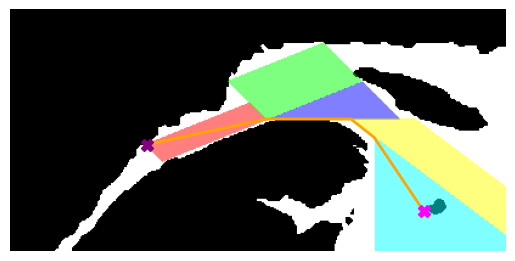

In [ ]:
xy = np.zeros((2,5))
xy[0,0] = departure_x
xy[1,0] = departure_y
xy[0,1] = 210
xy[1,1] = 90
xy[0,2] = 280
xy[1,2] = 90
xy[0,3] = 299
xy[1,3] = 105
xy[0,4] = arrival_x
xy[1,4] = arrival_y

fig, ax = plt.subplots()
ax.imshow(rgb_image, origin='upper')
ax.axis("off")

# Plot path
ax.plot(xy[0,:], xy[1,:], color='orange', linewidth=2, label='Trajet')
ax.plot(departure_x, departure_y, marker='X', color='purple', markersize=8, label='Departure')
ax.plot(arrival_x, arrival_y, marker='X', color='magenta', markersize=8, label='Arrival')
plt.show()

2. Computation of the cost of that solution, according to our precise simulation

In [ ]:
distance1 = np.linalg.norm(xy[:,1]-xy[:,0])
distance2 = np.linalg.norm(xy[:,2]-xy[:,1])
distance3 = np.linalg.norm(xy[:,3]-xy[:,2])
distance4 = np.linalg.norm(xy[:,4]-xy[:,3])
speed_magn = (distance1+distance2+distance3+distance4)/(T-2) #in the convex problem we force the first and last timestamp to have a zero speed so there is essentially 2h less in the trip

theta1 = np.arctan2(xy[1,1]-xy[1,0],xy[0,1]-xy[0,0])
theta2 = np.arctan2(xy[1,2]-xy[1,1],xy[0,2]-xy[0,1])
theta3 = np.arctan2(xy[1,3]-xy[1,2],xy[0,3]-xy[0,2])
theta4 = np.arctan2(xy[1,4]-xy[1,3],xy[0,4]-xy[0,3])

des_speed = np.zeros((2,4))
speed = np.zeros((2,4))
des_speed[0,0] = speed_magn*np.cos(theta1)
des_speed[1,0] = speed_magn*np.sin(theta1)
des_speed[0,1] = speed_magn*np.cos(theta2)
des_speed[1,1] = speed_magn*np.sin(theta2)
des_speed[0,2] = speed_magn*np.cos(theta3)
des_speed[1,2] = speed_magn*np.sin(theta3)
des_speed[0,3] = speed_magn*np.cos(theta4)
des_speed[1,3] = speed_magn*np.sin(theta4)

time = np.zeros(4)
time[0] = distance1/speed_magn
time[1] = distance2/speed_magn
time[2] = distance3/speed_magn
time[3] = distance4/speed_magn

#average meteo during the time the ship is in each zone
v_wind_vect = np.zeros((2,4))
v_current_vect = np.zeros((2,4))
Pv_vect = np.zeros(4)
v_wind_vect[0,0] = np.sum(meteo_data[0,0:int(time[0]+1),wind_speed_X])/int(time[0])
v_wind_vect[1,0] = np.sum(meteo_data[0,0:int(time[0]+1),wind_speed_Y])/int(time[0])
v_wind_vect[0,1] = np.sum(meteo_data[2,int(time[0]+1):int(time[1]+1),wind_speed_X])/int(time[1])
v_wind_vect[1,1] = np.sum(meteo_data[2,int(time[0]+1):int(time[1]+1),wind_speed_Y])/int(time[1])
v_wind_vect[0,2] = np.sum(meteo_data[2,int(time[1]+1):int(time[2]+1),wind_speed_X])/int(time[2])
v_wind_vect[1,2] = np.sum(meteo_data[2,int(time[1]+1):int(time[2]+1),wind_speed_Y])/int(time[2])
v_wind_vect[0,3] = np.sum(meteo_data[2,int(time[2]+1):int(time[3]+1),wind_speed_X])/int(time[3])
v_wind_vect[1,3] = np.sum(meteo_data[2,int(time[2]+1):int(time[3]+1),wind_speed_Y])/int(time[3])

v_current_vect[0,0] = np.sum(meteo_data[0,0:int(time[0]+1),current_speed_X])/int(time[0])
v_current_vect[1,0] = np.sum(meteo_data[0,0:int(time[0]+1),current_speed_Y])/int(time[0])
v_current_vect[0,1] = np.sum(meteo_data[2,int(time[0]+1):int(time[1]+1),current_speed_X])/int(time[1])
v_current_vect[1,1] = np.sum(meteo_data[2,int(time[0]+1):int(time[1]+1),current_speed_Y])/int(time[1])
v_current_vect[0,2] = np.sum(meteo_data[2,int(time[1]+1):int(time[2]+1),current_speed_X])/int(time[2])
v_current_vect[1,2] = np.sum(meteo_data[2,int(time[1]+1):int(time[2]+1),current_speed_Y])/int(time[2])
v_current_vect[0,3] = np.sum(meteo_data[2,int(time[2]+1):int(time[3]+1),current_speed_X])/int(time[3])
v_current_vect[1,3] = np.sum(meteo_data[2,int(time[2]+1):int(time[3]+1),current_speed_Y])/int(time[3])

Pv_vect[0] = np.sum(meteo_data[0,0:int(time[0]+1),direct_radiation_idx])/int(time[0])
Pv_vect[1] = np.sum(meteo_data[2,int(time[0]+1):int(time[1]+1),direct_radiation_idx])/int(time[1])
Pv_vect[2] = np.sum(meteo_data[2,int(time[1]+1):int(time[2]+1),direct_radiation_idx])/int(time[2])
Pv_vect[3] = np.sum(meteo_data[2,int(time[2]+1):int(time[3]+1),direct_radiation_idx])/int(time[3])


cost = 0
for i in range(3):
  final_position, final_speed, total_cost = compute_costs_position(xy[:,i], speed[:,i], des_speed[:,i], Fa,Fc,v_wind_vect[:,i],v_current_vect[:,i],Pv_vect[i],0,0,timstep,time[i],eff_motors,Kp,Ki,Kd)
  speed[:,i+1] = final_speed

  #update position and target speed because of control error
  xy[:,i+1] = final_position
  des_speed[:,i+1] = (xy[:,i+2] - xy[:,i+1])/time[i+1]
  cost = cost + total_cost
  print(final_position)
  print(final_speed)
  print(cost)
final_position, final_speed, total_cost = compute_costs_position(xy[:,3], speed[:,3], des_speed[:,3], Fa,Fc,v_wind_vect[:,3],v_current_vect[:,3],Pv_vect[3],0,0,timstep,time[3],eff_motors,Kp,Ki,Kd)
cost = cost + total_cost
print(final_position)
print(final_speed)
print(cost)


[207.44327728  89.04923916]
[15.98473457 -3.67637885]
26571.199045416695
[279.1414132   89.93355476]
[17.15660573  0.22481485]
32670.490296316526
[298.86425101 104.55630102]
[13.58051603 10.30335658]
39705.30545996621
[338.87961332 164.48138438]
[ 9.10110577 13.66660129]
58745.117455430736


3. Computation of the cost of that solution according to our optimization problem that negelects speed, currents and wind.

In [ ]:
pp = F*(np.power(speed_magn,3))/eff_motors
pg = pp - Pv_vect
costs = np.sum(0.5*(a[0]+a[1])*np.square(pg)+0.5*(b[0]+b[1])*pg+c[0]+c[1])*16/4 #16/4 because there is 16 timesteps at that speed but in that formualation Pv_vect is length 4 (one per zone)
print(costs)

14985.343865507091
